In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import time, datetime
from scipy import signal

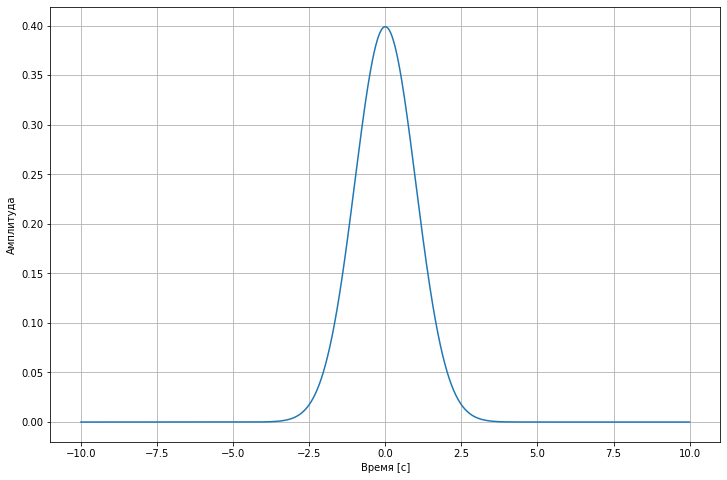

In [2]:
a1 = np.sqrt(1/2/np.pi) 
a2 = 1
Fs = 1000 
Ts = 1.0/Fs 
t0 = 0

df = pd.DataFrame()
df['t'] = np.arange(-10, 10, Ts)
## функция Гаусса
df['y'] = a1 * np.exp(-(df.t-t0)**2/2/a2)


fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.t, df.y)
ax.set_xlabel('Время [c]')
ax.set_ylabel('Амплитуда')
ax.grid()

Задание 8.17.1

In [3]:
N = len(df)
print(N)

20000


In [4]:
## создаём сетку частот
frq = np.fft.fftfreq(N, Ts)
print(frq[:20])
print(frq[19980:20000])
print(frq[14980:15020])
## нас интересуют только положительные частоты (отрицательные частоты симметричны) 
# frq = frq[range(int(N/2))]
# print(frq[:20])
# print(frq[9980:10000])

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95]
[-1.   -0.95 -0.9  -0.85 -0.8  -0.75 -0.7  -0.65 -0.6  -0.55 -0.5  -0.45
 -0.4  -0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.05]
[-251.   -250.95 -250.9  -250.85 -250.8  -250.75 -250.7  -250.65 -250.6
 -250.55 -250.5  -250.45 -250.4  -250.35 -250.3  -250.25 -250.2  -250.15
 -250.1  -250.05 -250.   -249.95 -249.9  -249.85 -249.8  -249.75 -249.7
 -249.65 -249.6  -249.55 -249.5  -249.45 -249.4  -249.35 -249.3  -249.25
 -249.2  -249.15 -249.1  -249.05]


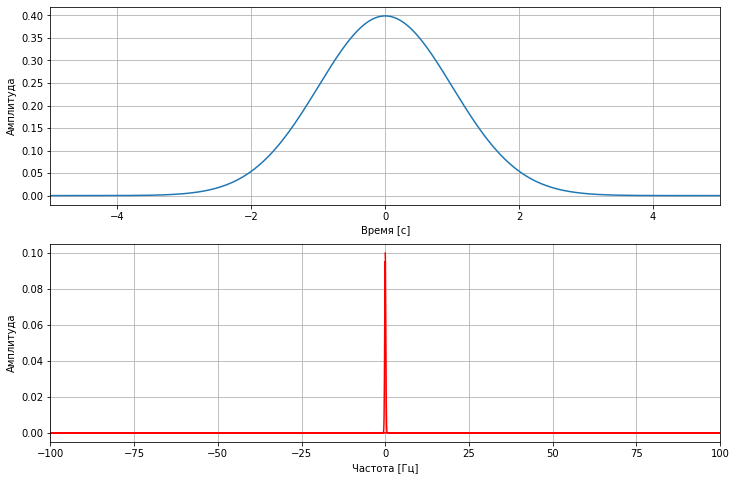

In [5]:
## делаем преобразование Фурье
Y = 2/N * np.fft.fft(df.y)
## нас интересуют только положительные частоты (отрицательные частоты симметричны) 
# Y = Y[range(int(N/2))]

## визуализируем
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].plot(df.t, df.y)
ax[0].set_xlim([-5, 5])
ax[0].set_xlabel('Время [c]')
ax[0].set_ylabel('Амплитуда')
ax[0].grid()

ax[1].plot(frq, abs(Y), 'r') 
ax[1].set_xlabel('Частота [Гц]')
ax[1].set_ylabel('Амплитуда')
ax[1].set_xlim([-100, 100])
ax[1].grid()

In [6]:
print(Y)

[ 0.1       +0.00000000e+00j -0.09518498+1.65730685e-13j
  0.08208687-2.85850145e-13j ... -0.06413806-3.35019665e-13j
  0.08208687+2.85846565e-13j -0.09518498-1.65727362e-13j]


In [7]:
len(Y)

20000

In [8]:
Y[9999], Y[10000], Y[10001]

((8.740162677217205e-20+1.1146753247343761e-19j),
 (3.6637408675413027e-19-6.929560185920688e-25j),
 (-3.441649357477057e-19+1.6978755493148308e-20j))

In [9]:
for i in range(20000):
    if Y[i] == max(Y):
        print(i, max(Y))

0 (0.10000000000005543+0j)


In [10]:
max(Y)

(0.10000000000005543+0j)

Задание 8.17.2

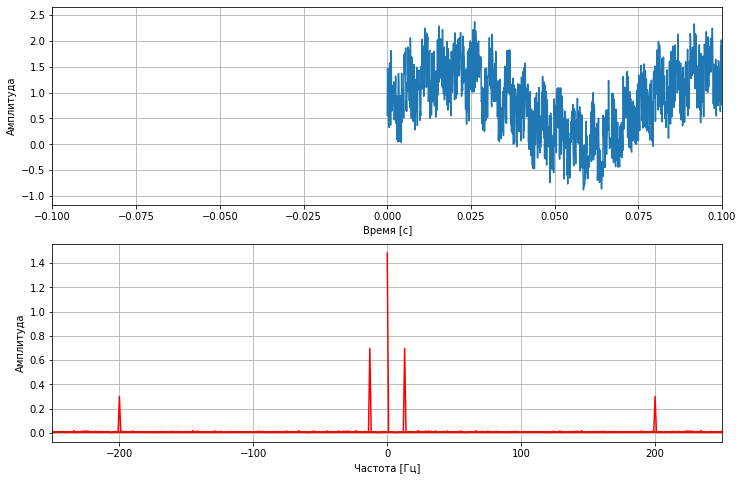

In [11]:
w1 = 13   ## частота первого синуса
w2 = 200  ## частота второго синуса
a1 = 0.7  ## амплитуда первого синуса
a2 = 0.3  ## амплитуда второго синуса
a3 = 1.5  ## амплитуда шума
Fs = 10000  ## частота дискретизации: 10 кГц
Ts = 1.0/Fs ## интервал времени между соседними точками

np.random.seed(42)

df = pd.DataFrame()
## ось времени
df['t'] = np.arange(0, 1, Ts)
## cигнал
df['y'] = a1*np.sin(2*np.pi*w1*df.t) + a2*np.sin(2*np.pi*w2*df.t) + a3*np.random.random(len(df))

N = len(df)
## создаём сетку частот
frq = np.fft.fftfreq(N, Ts)
## нас интересуют только положительные частоты (отрицательные частоты симметричны) 
#frq = frq[range(int(N/2))]

## делаем преобразование Фурье
Y = 2/N * np.fft.fft(df.y)
## нас интересуют только положительные частоты (отрицательные частоты симметричны) 
#Y = Y[range(int(N/2))]

## визуализируем
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].plot(df.t, df.y)
ax[0].set_xlim([-0.1, 0.1])
ax[0].set_xlabel('Время [c]')
ax[0].set_ylabel('Амплитуда')
ax[0].grid()

ax[1].plot(frq, abs(Y), 'r') 
ax[1].set_xlabel('Частота [Гц]')
ax[1].set_ylabel('Амплитуда')
ax[1].set_xlim([-250, 250])
ax[1].grid()

In [12]:
## создаём фильтр ("фильтр Баттерворта")
b, a = signal.butter(8, 250, fs=Fs)
df['y_filt'] = signal.lfilter(b, a, df.y)
df['y_filt_double'] = signal.filtfilt(b, a, df.y)
print(np.mean(abs(df['y_filt_double'])))

0.7671850835933105


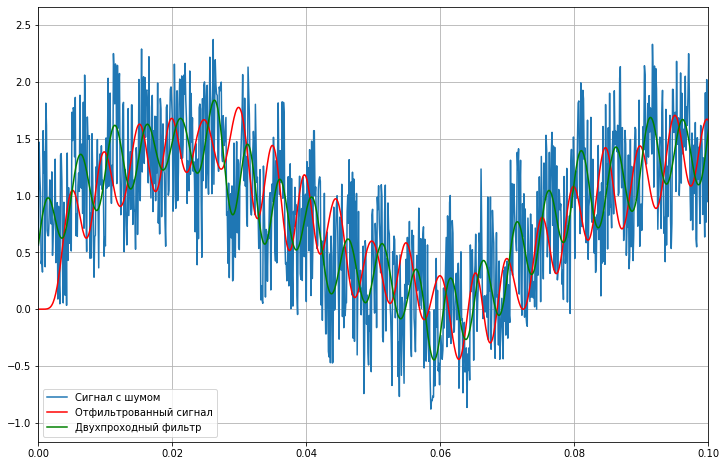

In [13]:
f, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.t, df.y)
ax.plot(df.t, df.y_filt, 'r')
ax.plot(df.t, df.y_filt_double, 'g')
ax.set_xlim([0, 0.1])
ax.legend(['Сигнал с шумом', 'Отфильтрованный сигнал', 'Двуxпроходный фильтр'])
ax.grid()

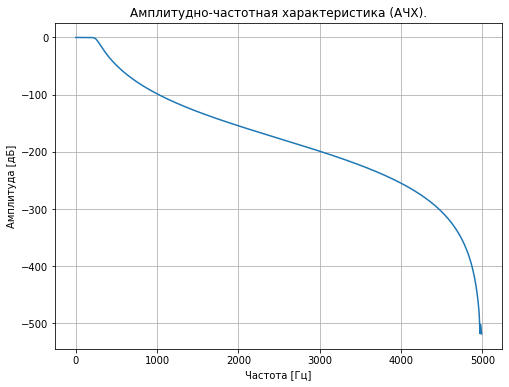

In [14]:
## АЧХ фильтра
w, h = signal.freqz(b, a)
w = Fs/np.pi/2 * w ## переводим радианы в Герцы
f, ax = plt.subplots(figsize=(8, 6))
ax.plot(w, 20 * np.log10(abs(h)))
#ax.set_xlim([0, 200])
#ax.set_ylim([-35, 1])
ax.set_ylabel('Амплитуда [дБ]')
ax.set_xlabel('Частота [Гц]')
ax.set_title('Амплитудно-частотная характеристика (АЧХ).')
ax.grid()

In [15]:
ind = np.where((w > 254-5) & (w < 254+5))[0][0]
ind

26

In [16]:
print(f'Подавление сигнала на частоте 254 Гц: {20 * np.log10(abs(h[ind])):.1f} дБ  (в {1/abs(h[ind]):0.1f} раз)')

Подавление сигнала на частоте 254 Гц: -3.6 дБ  (в 1.5 раз)


In [17]:
ind = np.where((w > 500-5) & (w < 500+5))[0][0]
ind

51

In [18]:
print(f'Подавление сигнала на частоте 500 Гц: {20 * np.log10(abs(h[ind])):.1f} дБ  (в {1/abs(h[ind]):0.1f} раз)')

Подавление сигнала на частоте 500 Гц: -48.3 дБ  (в 260.6 раз)


In [19]:
w.shape

(512,)

In [20]:
x=np.array([1,2,3,4,5,6,7,8,9])

In [21]:
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
np.where((x > 5))

(array([5, 6, 7, 8], dtype=int64),)

Задание 8.17.4

In [32]:
b, a = signal.cheby2(4, 40, 30, 'highpass', fs=Fs)

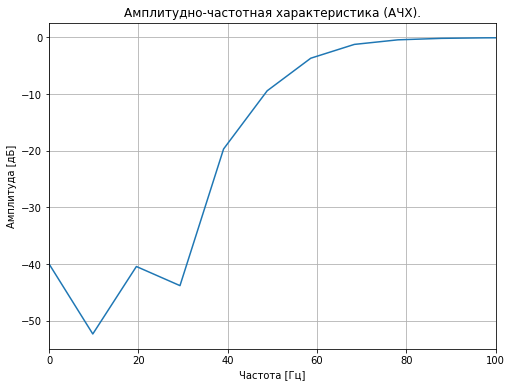

In [33]:
## АЧХ фильтра
w, h = signal.freqz(b, a)
w = Fs/np.pi/2 * w ## переводим радианы в Герцы
f, ax = plt.subplots(figsize=(8, 6))
ax.plot(w, 20 * np.log10(abs(h)))
ax.set_xlim([0, 100])
#ax.set_ylim([-35, 1])
ax.set_ylabel('Амплитуда [дБ]')
ax.set_xlabel('Частота [Гц]')
ax.set_title('Амплитудно-частотная характеристика (АЧХ).')
ax.grid()

In [35]:
ind = np.where((w > 29-5) & (w < 29+5))[0][0]
ind

3

In [36]:
print(f'Подавление сигнала на частоте 29 Гц: {20 * np.log10(abs(h[ind])):.1f} дБ  (в {1/abs(h[ind]):0.1f} раз)')

Подавление сигнала на частоте 29 Гц: -43.8 дБ  (в 154.7 раз)


In [37]:
df['y_filt'] = signal.lfilter(b, a, df.y)
#df['y_filt_double'] = signal.filtfilt(b, a, df.y)
print(np.mean(abs(df['y_filt'])))

0.39862337841359474


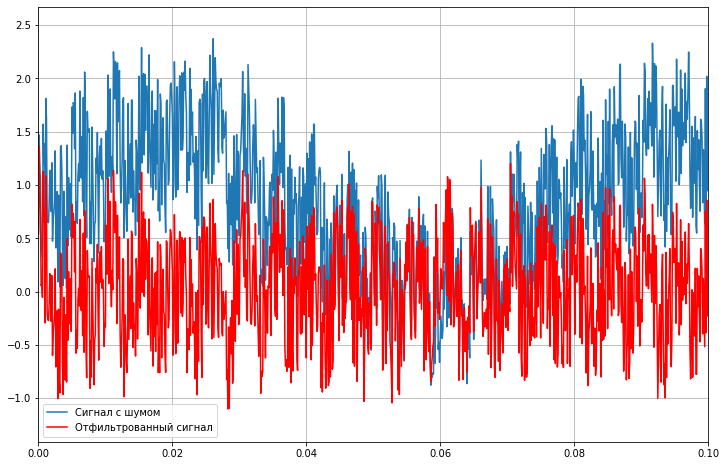

In [39]:
f, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.t, df.y)
ax.plot(df.t, df.y_filt, 'r')
#ax.plot(df.t, df.y_filt_double, 'g')
ax.set_xlim([0, 0.1])
ax.legend(['Сигнал с шумом', 'Отфильтрованный сигнал', 'Двуxпроходный фильтр'])
ax.grid()